# Weighted ECM clustering vs Traditional ECM clustering
## With Lonosphere dataset

In [11]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_plot, ev_pcaplot, calculate_non_specificity, ev_plot_PCA
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Lonoshpere cancer DS: 351 instances, 34 features


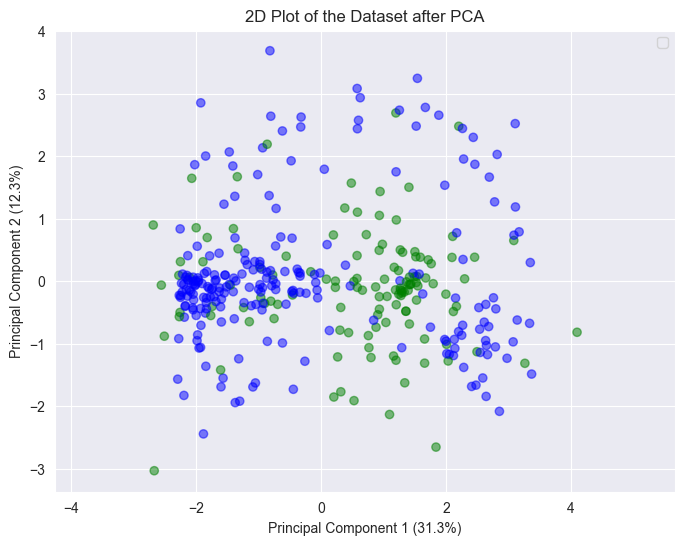

In [12]:
# fetch dataset
iris = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = iris.data.features
X = X.fillna(0)
X = X.astype(float)
y = iris.data.targets

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['Class'])
df = pd.concat([X, y], axis=1)

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"Lonoshpere cancer DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
value_to_color = {0: 'green', 1: 'blue', 2: 'red'}
colors = [value_to_color[val] for val in numeric_labels]

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=colors)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


## Traditional ECM

[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[   0.         1232.61975637 1232.61975637]
[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[1.00000000e+00 1.23261976e+03 1.23261976e+03]
[1, 1237.7280929155909]
[2, 1232.979379836437]
[3, 1232.6644393737981]
[4, 1232.625508613451]
[5, 1232.6204028263685]
[6, 1232.6197569287806]
[   2.         1232.61975693 1232.61975637]
[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[   3.         1232.61975637 1232.61975637]
[1, 1237.6570065240874]
[2, 1232.963938060322]
[3, 1232.662324777123]
[4, 1232.6252458034126]
[5, 1232.620375789925]
[6, 1232.6197563741284]
[   4.         1232.61975637 1232.61975637]
[1, 1237.7280929155909]
[2, 1232.979379836437]
[3, 1232.6644393737981]


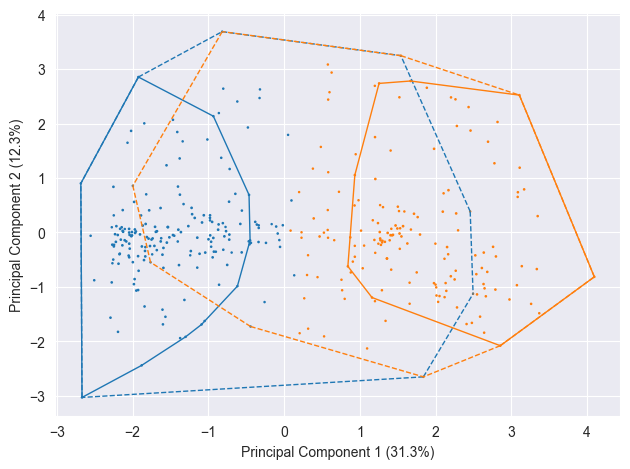

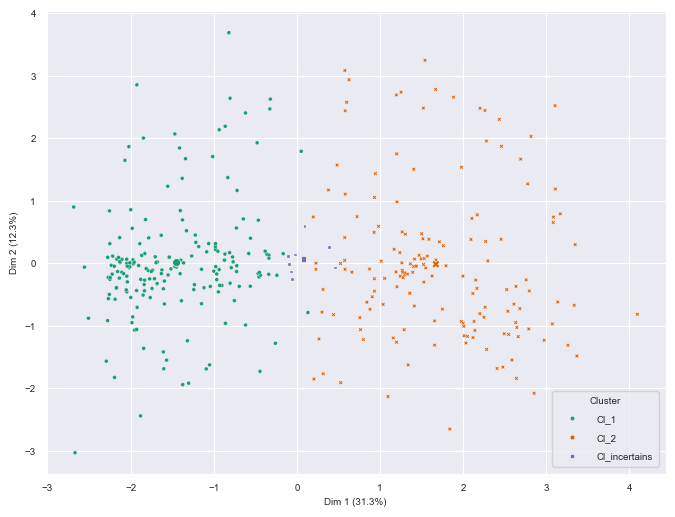

In [13]:
# Traditional ECM clustering
model = ecm(x=X, c=2, beta=2, alpha=1, delta=100, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plots
ev_plot_PCA(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

## Weighted ECM (WECM)

Initial weights: 
 [[0.01874558 0.03756382 0.11515263 0.0926432  0.2118959  0.00638108
  0.03626486 0.00890665 0.01552248 0.00040215 0.04744373 0.02609093
  0.0067349  0.03222767 0.00280934 0.05639398 0.02956154 0.01815335
  0.0113915  0.02791201 0.00909102 0.01775367 0.02400567 0.00414047
  0.01034573 0.00852981 0.01970539 0.0111423  0.02231313 0.0007771
  0.00482652 0.01340694 0.03017751 0.02158743]
 [0.00900674 0.01784276 0.0026181  0.06946688 0.00875512 0.0024199
  0.05833206 0.04237035 0.03721093 0.07326255 0.04580851 0.00906556
  0.01167069 0.03077393 0.03137132 0.05553618 0.0316837  0.0286053
  0.01229708 0.00941297 0.02159888 0.07377501 0.01407108 0.02017239
  0.00850168 0.01191496 0.00994017 0.05019157 0.0155723  0.03514602
  0.04687855 0.04290849 0.02931429 0.03250397]]
---------Iteration #1---------
Initial prototypes: 
 [[ 9.57671958e-01  0.00000000e+00  8.17452593e-01 -3.38486772e-02
   8.57858360e-01  3.17229630e-02  8.35581693e-01 -2.87316402e-02
   8.16146667e-01  2.046

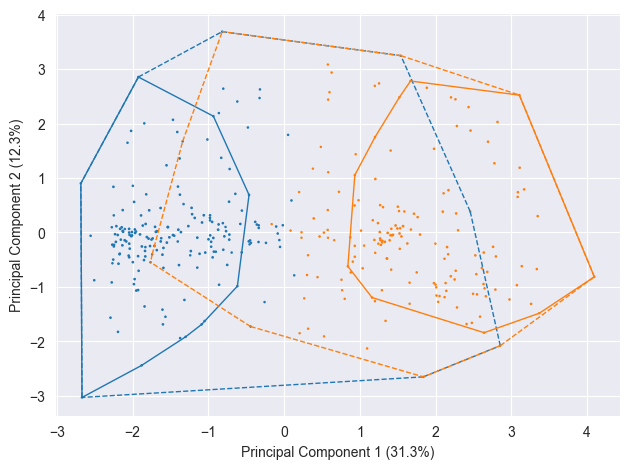

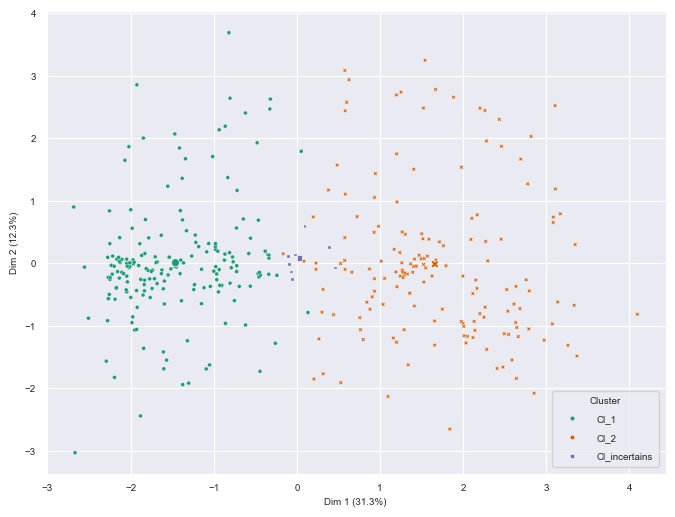

Covariance Matrix 1: [0.040752   0.         0.06065039 0.11161787 0.03794178 0.12608805
 0.04404595 0.14528143 0.05264782 0.10027954 0.04199145 0.13254166
 0.03364429 0.14757169 0.0313553  0.16416739 0.05029704 0.16876215
 0.05821155 0.1639062  0.05849764 0.17304856 0.08419609 0.21686228
 0.07112386 0.18795883 0.05825642 0.1877113  0.08772048 0.20028858
 0.11312946 0.22597558 0.11374239 0.21719308]
Covariance Matrix 2: [0.15182885 0.         0.37903508 0.27970722 0.36532834 0.29419103
 0.26949898 0.36711274 0.26381721 0.3229347  0.32826437 0.34598289
 0.3310647  0.34152742 0.28871016 0.2527804  0.33878762 0.33872779
 0.37109313 0.39421782 0.26898913 0.37419547 0.31690268 0.35024552
 0.38918745 0.33813316 0.40950682 0.42696542 0.39353132 0.32555925
 0.32212785 0.30951616 0.23697474 0.21978167]


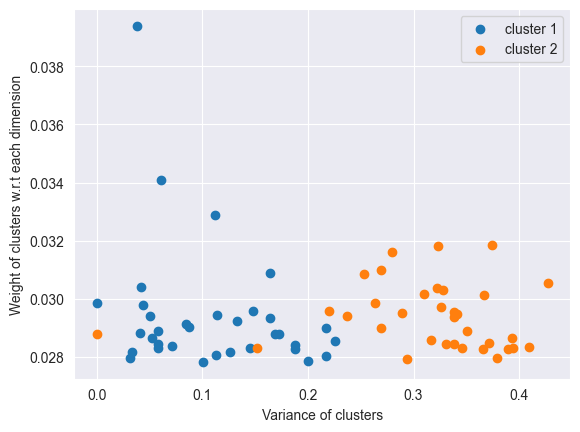

In [17]:
# Weighted ECM clustering
W = np.array([
    [0.01874558, 0.03756382, 0.11515263, 0.0926432, 0.2118959, 0.00638108
        , 0.03626486, 0.00890665, 0.01552248, 0.00040215, 0.04744373, 0.02609093
        , 0.0067349, 0.03222767, 0.00280934, 0.05639398, 0.02956154, 0.01815335
        , 0.0113915, 0.02791201, 0.00909102, 0.01775367, 0.02400567, 0.00414047
        , 0.01034573, 0.00852981, 0.01970539, 0.0111423, 0.02231313, 0.0007771
        , 0.00482652, 0.01340694, 0.03017751, 0.02158743],
    [0.00900674, 0.01784276, 0.0026181, 0.06946688, 0.00875512, 0.0024199
        , 0.05833206, 0.04237035, 0.03721093, 0.07326255, 0.04580851, 0.00906556
        , 0.01167069, 0.03077393, 0.03137132, 0.05553618, 0.0316837, 0.0286053
        , 0.01229708, 0.00941297, 0.02159888, 0.07377501, 0.01407108, 0.02017239
        , 0.00850168, 0.01191496, 0.00994017, 0.05019157, 0.0155723, 0.03514602
        , 0.04687855, 0.04290849, 0.02931429, 0.03250397]
])
c = 2
model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10, epsi=1e-3)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Weighted ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")
print(f"Final weights: \n{model['W']}")

print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")
# Calculate Non-specificity
calculate_non_specificity(model)

# Plots
ev_plot_PCA(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)
W = model['W']
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label="cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label="cluster 2", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

## Non-specificity equation
![test.png](assets/normlaized-non-specificity.png)